In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import h5py
import numpy as np

In [ ]:
!pip install obspy

     |████████████████████████████████| 24.7MB 121kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for obspy: filename=obspy-1.2.2-cp37-cp37m-linux_x86_64.whl size=21665915 sha256=d264e18088c58f83861f35d6379a88596ff7b5b27c4b3c136e41db7879c80ad2
  Stored in directory: /root/.cache/pip/wheels/94/e0/86/44fd4cea7661f42431c8f6d030f2758ff275cccffcbe8fa2b8
Successfully built obspy


In [3]:
#import obspy
import h5py
#from obspy import UTCDateTime
import numpy as np
#from obspy.clients.fdsn.client import Client
import matplotlib.pyplot as plt

In [ ]:
def make_stream(dataset):
    '''
    input: hdf5 dataset
    output: obspy stream

    '''
    data = np.array(dataset)

    tr_E = obspy.Trace(data=data[:, 0])
    tr_E.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_E.stats.delta = 0.01
    tr_E.stats.channel = dataset.attrs['receiver_type']+'E'
    tr_E.stats.station = dataset.attrs['receiver_code']
    tr_E.stats.network = dataset.attrs['network_code']

    tr_N = obspy.Trace(data=data[:, 1])
    tr_N.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_N.stats.delta = 0.01
    tr_N.stats.channel = dataset.attrs['receiver_type']+'N'
    tr_N.stats.station = dataset.attrs['receiver_code']
    tr_N.stats.network = dataset.attrs['network_code']

    tr_Z = obspy.Trace(data=data[:, 2])
    tr_Z.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_Z.stats.delta = 0.01
    tr_Z.stats.channel = dataset.attrs['receiver_type']+'Z'
    tr_Z.stats.station = dataset.attrs['receiver_code']
    tr_Z.stats.network = dataset.attrs['network_code']

    stream = obspy.Stream([tr_E, tr_N, tr_Z])

    return stream

In [4]:
import pandas as pd
import numpy as np
def getSamples(fileName, setStart, setEnd, startIndex, endIndex):
  # fileName: like 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
  # setStart: start index of dataset chosen
  # setEnd: end index of dataset chosen
  # startIndex: start position of choosen slide window
  # endIndex: end position of choosen slide window
  file_name = fileName
  dtf1 = h5py.File(file_name,'r')
  data_group = dtf1["data"]

  data_keys = list(data_group.keys())
  fileList = data_keys[setStart:setEnd]

  sample_list = []
  #time_list = []
  for i in range(len(fileList)):
     sub_name = "data/" + fileList[i] + ""
     #print(sub_name)
     dataset = dtf1.get(sub_name)
     st = make_stream(dataset)
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     sample_list.extend(st_list)
     #timestart = fileList[i][8:12] + "-" + fileList[i][12:14] + "-" + fileList[i][14:16] + " " + fileList[i][16:18] + ":" + fileList[i][18:20] + ":00" 
     #print(timestart)
     #time1 = np.datetime64(timestart, 'ms')
     #timeStamp = pd.date_range(time1, freq='10L', periods=6000).strftime("%Y-%m-%d %H:%M:%S").tolist()
     #time_list.extend(timeStamp[startIndex:endIndex])

  return sample_list

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'

noise_train = getSamples(fileName=fileName, setStart=0, setEnd=30000, startIndex=0, endIndex=6000)
#df_noise = pd.DataFrame(noise_train)
#noise_train = np.array(noise_train)
#df_noise.to_csv('drive/Shareddrives/anomalyResearch/noisetrain-w7.csv', index=False)

In [ ]:
noise_train = np.array(noise_train)
pd.DataFrame(noise_train).to_csv("drive/Shareddrives/anomalyResearch/train_data1_week7.csv",header=None, index=None)

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'

noise_test = getSamples(fileName=fileName, setStart=30001, setEnd=35001, startIndex=0, endIndex=6000)

In [ ]:
noisea_test = np.array(noise_test)
pd.DataFrame(noisea_test).to_csv("drive/Shareddrives/anomalyResearch/test_data1_week7.csv",header=None, index=None)

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk3/chunk3.hdf5'

earth_train = getSamples(fileName=fileName, setStart=0, setEnd=30000, startIndex=0, endIndex=6000)

In [ ]:
eartha_train = np.array(earth_train)
pd.DataFrame(eartha_train).to_csv("drive/Shareddrives/anomalyResearch/train_data1_week7.csv",mode='a', header=False, index=None)

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk3/chunk3.hdf5'

earth_test = getSamples(fileName=fileName, setStart=30001, setEnd=35001, startIndex=0, endIndex=6000)

In [ ]:
eartha_test = np.array(earth_test)
pd.DataFrame(eartha_test).to_csv("drive/Shareddrives/anomalyResearch/test_data1_week7.csv",mode='a', header=False, index=None)

In [ ]:
noise_train = noise_train.tolist()

In [5]:
train_data = pd.read_csv('drive/Shareddrives/anomalyResearch/train_data1_week7.csv',header=None)

In [6]:
arr_train = np.array(train_data) 

In [ ]:
list_train = arr_train.tolist()

In [9]:
max(arr_train)-min(arr_train)

array([2521810.])

In [ ]:
k = 2/(max(arr_train)-min(arr_train))
transform_value=[-1+k*(x-min(arr_train)) for x in arr_train]

In [ ]:
len(train_data)

360000000

In [ ]:
type(train_data)

pandas.core.frame.DataFrame

In [ ]:
train_data = np.array(train_data).reshape(60000,6000)
train_data

array([[ -0.00000000e+00,  -4.85846000e-03,  -2.79046000e-02, ...,
         -5.83046000e-03,  -2.75239000e-03,  -0.00000000e+00],
       [ -0.00000000e+00,  -1.98475000e-02,  -6.47222000e-02, ...,
          1.89024000e-02,   1.01001000e-02,   0.00000000e+00],
       [  0.00000000e+00,   1.18605000e-02,   2.19268000e-02, ...,
         -6.00076000e-03,  -1.91496000e-03,  -0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -8.84754000e-05,  -8.63603000e-04, ...,
          1.81966000e-03,   9.04094000e-04,   0.00000000e+00],
       [ -0.00000000e+00,  -1.75119000e-04,   4.69877000e-04, ...,
          2.43141000e-03,   9.28034000e-05,   0.00000000e+00],
       [  0.00000000e+00,   2.45800000e-04,   9.73878000e-04, ...,
          2.12812000e-04,  -7.93146000e-05,  -0.00000000e+00]])

In [ ]:
train_y0 = [0] * 30000
train_y1 = [1] * 30000
train_y = train_y0 + train_y1
train_y = np.array(train_y)
train_y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
test_data = pd.read_csv('drive/Shareddrives/anomalyResearch/test_data1_week7.csv',header=None)
len(test_data)

60000000

In [ ]:
test_data = np.array(test_data).reshape(10000,6000)
test_data

array([[  2.80070000e+00,   6.85444000e+00,  -5.06180000e+00, ...,
         -9.96250000e+00,  -6.47466000e+00,  -1.13005000e+01],
       [  1.06008000e+01,   1.52603000e+01,   1.16628000e+01, ...,
         -1.35620000e+01,  -3.83459000e+00,  -1.72674000e+01],
       [  7.30834000e+00,   5.84911000e+00,  -9.38410000e-01, ...,
         -5.08367000e+01,  -4.93232000e+01,  -3.95368000e+01],
       ..., 
       [ -0.00000000e+00,  -2.25159000e-04,  -6.87125000e-04, ...,
          3.47190000e-04,   1.42748000e-05,  -0.00000000e+00],
       [ -0.00000000e+00,  -7.57885000e-04,  -1.11669000e-03, ...,
         -2.71939000e-03,  -6.41935000e-04,  -0.00000000e+00],
       [ -0.00000000e+00,  -1.50445000e-04,  -5.93969000e-04, ...,
         -2.83108000e-03,   2.04540000e-05,  -0.00000000e+00]])

In [ ]:
test_y0 = [0] * 5000
test_y1 = [1] * 5000
test_y = test_y0 + test_y1
test_y = np.array(test_y)
test_y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
import os
import numpy as np

import keras.backend as K

import keras
from keras.layers import Input, Dense
from keras.models import Model, save_model, load_model
#from noise_util import add_distortion_noise, add_distortion_blur
#from noise_util import rotate90_if_not_zero

import matplotlib.pyplot as plt
import sklearn.metrics as sk
from skimage.filters import gaussian
% matplotlib inline

In [ ]:
##### Set parameters
training_epochs = 10
#image_size = 28
input_dim = 6000
n_labels = 2
bottleneck_dim = 128
batch_size = 128

##### Base model
inputs = Input(shape=(input_dim, ), name='image_input')
h1 = Dense(256, activation='relu', name='h1')(inputs)
h2 = Dense(256, activation='relu', name='h2')(h1)

##### Scorer
h3 = Dense(256, activation='relu', name='h3')(h2)
logits_out = Dense(n_labels, activation='softmax', name='logits_out')(h3)

##### Decoder
bottleneck = Dense(bottleneck_dim,
                   activation='relu',
                   name='bottleneck')(h2)
decode1 = Dense(256, activation='relu', name='decode1')(bottleneck)
decode2 = Dense(256, activation='relu', name='decode2')(decode1)
reconstruction = Dense(input_dim, name='rec_output')(decode2)

##### Instantiate base model
base_model = Model(inputs, [h2, logits_out, reconstruction], name='base')

print(base_model.summary())

base_model.compile(optimizer='adam',
                   loss={'logits_out': 'sparse_categorical_crossentropy',
                         'rec_output': 'mean_squared_error'},
                   loss_weights={'logits_out': 0.9,
                                 'rec_output': 0.1})

##### Train base model
base_model.fit(train_data,
               {'logits_out': train_y,
                'rec_output': train_data},
               validation_data = (test_data, {'logits_out': test_y, 'rec_output' : test_data}),
               epochs=training_epochs, batch_size=batch_size)

# test_loss, test_acc
test_result = base_model.evaluate(x = test_data,
                                  y = {'logits_out': test_y,'rec_output': test_data})


print("metric names:", base_model.metrics_names)


print(test_result)

# ##### SAVE MODEL
# save_model(base_model, "./mnist_aux_base.hdf5")

Model: "base"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 6000)]       0                                            
__________________________________________________________________________________________________
h1 (Dense)                      (None, 256)          1536256     image_input[0][0]                
__________________________________________________________________________________________________
h2 (Dense)                      (None, 256)          65792       h1[0][0]                         
__________________________________________________________________________________________________
bottleneck (Dense)              (None, 128)          32896       h2[0][0]                         
_______________________________________________________________________________________________

In [ ]:
##### Freeze base model layers to prevent optimization

for l in base_model.layers:
    l.trainable = False

In [ ]:
class Merge3Ways(keras.layers.Layer):
    
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(Merge3Ways, self).__init__(**kwargs) # this is the process of creating my own layer

    def build(self, input_shape, dtype = None):

        # Destructuring shapes
        shape_x, shape_h2, shape_logits, shape_rec = list(map(lambda shape: int(shape[1]), input_shape))

        print(shape_h2, self.output_dim)
            
        self.weight1 = self.add_weight(name='h2_to_merge',
                                       shape=(shape_h2, self.output_dim),
                                       initializer='uniform')
        
        self.weight2 = self.add_weight(name='logits_to_merge',
                                       shape=(shape_logits, self.output_dim),
                                       initializer='uniform')
        
        self.weight3 = self.add_weight(name='rec_to_merge',
                                       shape=(shape_rec, self.output_dim),
                                       initializer='uniform')
        
        self.bias = self.add_weight(name='bias',
                                    shape=(self.output_dim,),                                        
                                    initializer='uniform')
        
        super(Merge3Ways, self).build(input_shape)

    def call(self, inputs, dtype = None):

        ##### usage here: merged = Merge3Ways(512)([image_inputs, h2, logits_out, reconstruction])
        ##### inputs here should have a form of list such that: [image_inputs, h2, logits_out, reconstruction]
        
        x, h2, logits_out, reconstruction = inputs
        a1 = K.dot(h2, self.weight1)
        a2 = K.dot(logits_out, self.weight2)
        a3 = K.dot(K.square(reconstruction-x), self.weight3) # subtraction and elementwise squaring
        return (a1 + a2 + a3) + self.bias
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], self.output_dim)

In [ ]:
image_inputs = base_model.inputs[0]

##### Deconstruct outputs from previous base model

h2, logits_out, reconstruction = base_model.outputs

In [ ]:
merged = Merge3Ways(512)([image_inputs, h2, logits_out, reconstruction]) # output dimension of 512

risk_1 = Dense(128, activation='relu', name='risk_1')(merged)
risk_out = Dense(1, name='risk_out', activation='sigmoid')(risk_1)

# Instantiate abnormality module
aux_model = Model(image_inputs, [logits_out, risk_out])

print(aux_model.summary())

256 512
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 6000)]       0                                            
__________________________________________________________________________________________________
h1 (Dense)                      (None, 256)          1536256     image_input[0][0]                
__________________________________________________________________________________________________
h2 (Dense)                      (None, 256)          65792       h1[0][0]                         
__________________________________________________________________________________________________
bottleneck (Dense)              (None, 128)          32896       h2[0][0]                         
______________________________________________________________________________________

In [ ]:
distortion = np.random.uniform(low=0.9, high=1.2)


def add_noise(batch, complexity=0.5):
    return batch + np.random.normal(size=batch.shape, scale=1e-9 + complexity)


def add_distortion_noise(batch):
    return batch + np.random.normal(size=batch.shape, scale=1e-9 + distortion)


def add_distortion_blur(img):
    image = img.reshape((-1, 60, 100))
    return gaussian(image, sigma=5*distortion).reshape((-1, 60*100))


def rotate180_if_not_zero(batch, batch_label):
    mask = batch_label != 0

    nonzeros = batch[mask]
    nonzeros = np.rot90(nonzeros.reshape((-1, 60, 100)),2).reshape((-1, 60*100))

    zeros = batch[np.invert(mask)]
    zeros = add_noise(zeros, complexity=1)
    batch = np.vstack((nonzeros, zeros))

    return batch

In [ ]:
def mnist_fetcher(mnist_x, chunksize, mnist_y=None):
    
    print('Data shape:', mnist_x.shape[0], 
          'Chunk size: ', chunksize)
    
    num_chunks = mnist_x.shape[0] // chunksize
    
    print(num_chunks)
    
    for i in range(num_chunks):
        if mnist_y is not None: # if true
            yield [mnist_x[i * chunksize: (i + 1) * chunksize],
                   mnist_y[i * chunksize: (i + 1) * chunksize]]
        else:
            yield mnist_x[i * chunksize: (i + 1) * chunksize]

In [ ]:
print('Batch size: ', batch_size)
            
chunksize_train = int(batch_size*(4/6))
print('Chunk size for train: ', chunksize_train)
chunksize_test = int(batch_size*(2/6))
print('Chunk size for test: ', chunksize_test)

tcu = chunksize_train // 4 # create different images by tcu unit
print('TCU: ', tcu)

Batch size:  128
Chunk size for train:  85
Chunk size for test:  42
TCU:  21


In [ ]:
##### Setup datasets for training abnormality module

batches = []

for train_x, train_y in mnist_fetcher(train_data, chunksize_train, train_y):

    # In-distribution dataset(half of batch)
    bx0 = train_x[:tcu]   # 25% of train dataset is in-distribution
    
    # Out-of-distribution dataset(rest half of batch) by adding noise(see image_augmenting.py)
    bx1 = train_x[tcu:2*tcu]  # 25% of train dataset is OOD-ed by adding distortion noise
    bx1 = add_distortion_noise(bx1) # distortion noise

    bx2 = train_x[2*tcu:3*tcu]  # 25% of train dataset is OOD-ed by adding distorting blur
    bx2 = add_distortion_blur(bx2) # distortion blur

    bx3 = train_x[3*tcu:]  # 25% of train dataset is OOD-ed by rotating 90 degree
    by3 = train_y[3*tcu:]
    bx3 = rotate180_if_not_zero(bx3, by3) # rotation 90

    assert(len(bx3) == len(by3))

    
    bx = np.vstack((bx0, bx1, bx2, bx3))  # Stack altogether and label whether the observation comes from in or out of distribution
    by = np.zeros(len(bx))
    by[:len(bx0)] = 1 # label 25% as in-distribution
        
    batch = [bx, by] # create as a batch
    
    batches.append(batch)

Data shape: 60000 Chunk size:  85
705


In [ ]:
aux_model.compile(optimizer='adam',
                  loss={'risk_out': 'binary_crossentropy'})
print(aux_model.summary())

epochs = 5
batch_size = 128

for epoch in range(epochs):
    for batch in batches:
        bx, by = batch
        aux_model.fit(bx,
                      {'risk_out': by},
                      batch_size=batch_size,
                      validation_data = (test_data[:1000], {'risk_out':test_y[:1000]}),
                      verbose=1)

len_testset = test_data.shape[0]
test_result = aux_model.evaluate(x=test_data,
                                 y=np.ones(shape=(len_testset, 1)))

print("metric names:", aux_model.metrics_names)
print(test_result)

# # Save model
# save_model(aux_model, "./mnist_abnormal.hdf5")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 6000)]       0                                            
__________________________________________________________________________________________________
h1 (Dense)                      (None, 256)          1536256     image_input[0][0]                
__________________________________________________________________________________________________
h2 (Dense)                      (None, 256)          65792       h1[0][0]                         
__________________________________________________________________________________________________
bottleneck (Dense)              (None, 128)          32896       h2[0][0]                         
______________________________________________________________________________________________

image label: 0


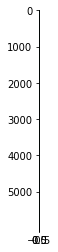

In [ ]:
single_mnist_test = np.reshape(test_data[4000], (6000, 1))
print('image label:', test_y[4000])
plt.imshow(single_mnist_test)
plt.show()
plt.close()

In [ ]:
result_in = aux_model.predict(np.reshape(single_mnist_test, (1,single_mnist_test.ravel().shape[0])))
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

max_index = [i[0] for i in enumerate(softmax(result_in[0])[0] == max(softmax(result_in[0])[0])) if i[1]]

print('The succ/failure classification:', max_index)
print('Softmax probability of in distribution:', format(result_in[1][0][0], '.2f'))

The succ/failure classification: [0]
Softmax probability of in distribution: 1.00


In [ ]:
from skimage.filters import gaussian

def add_distortion_softblur(img):
    image = img.reshape((-1, 6000, 1))
    return gaussian(image, sigma=5*distortion).reshape((-1, 6000*1))

image label: 0


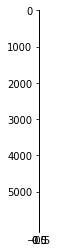

[array([[  1.00000000e+00,   2.80411070e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


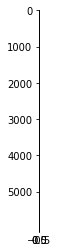

[array([[  1.00000000e+00,   2.22055820e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


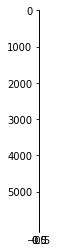

[array([[  1.00000000e+00,   2.96425753e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


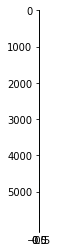

[array([[  1.00000000e+00,   3.34423414e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


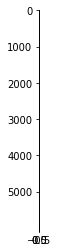

[array([[  1.00000000e+00,   8.29574107e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


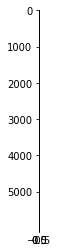

[array([[  1.00000000e+00,   1.00071847e-13]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


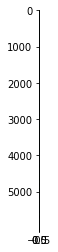

[array([[  1.00000000e+00,   8.63397488e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


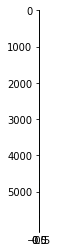

[array([[  1.00000000e+00,   4.68732420e-13]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


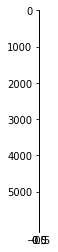

[array([[  1.00000000e+00,   9.21296798e-14]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00
image label: 0


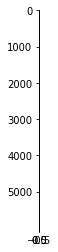

[array([[  1.00000000e+00,   3.38907114e-12]], dtype=float32), array([[ 0.]], dtype=float32)]
The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00


In [ ]:
for i in np.arange(0, 2, 0.2):

    distortion = np.random.uniform(low=0.4, high= i)

    single_mnist_out_test = np.reshape(add_distortion_softblur(test_data[2048]), (6000, 1))

    ##### printing original image
    
    print('image label:', test_y[2023])
    plt.imshow(single_mnist_out_test)
    plt.show()
    plt.close()

    result_out = aux_model.predict(np.reshape(single_mnist_out_test, (1,single_mnist_out_test.ravel().shape[0])))
    print(result_out)

    max_index = [i[0] for i in enumerate(softmax(result_out[0])[0] == max(softmax(result_out[0])[0])) if i[1]]

    ##### printing succ/fail classification and in/out classification probability result
    print('The succ/failure classification:', max_index)
    print('Softmax probability of in/out distribution:', format(result_out[1][0][0], '.2f'))